# This is a the Data Mining project from S4603983 Chih-Wei Hsiao  

## Coding Environment
- MacOS BigSur
    - Python 3.8.3 
        - pandas
        - numpy
        - sklearn    
    - Jupyher Notebook 6.0.3
    
The following guide will tell you how to run these code

# 1. Read Training Data Ecoli.CSV

In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import IsolationForest
pd.options.display.max_rows=300
pd.set_option('display.max_columns', 500)
from sklearn.cluster import KMeans
db = pd.read_csv(" Ecoli.csv")
G = db["Target (Column 117)"]
#db
Pred = db.drop(['Target (Column 117)'], axis=1)
Pred
#db.isna()


,(Num) Column 1,(Num) Column 2,(Num) Column 3,(Num) Column 4,(Num) Column 5,(Num) Column 6,(Num) Column 7,(Num) Column 8,(Num) Column 9,(Num) Column 10,(Num) Column 11,(Num) Column 12,(Num) Column 13,(Num) Column 14,(Num) Column 15,(Num) Column 16,(Num) Column 17,(Num) Column 18,(Num) Column 19,(Num) Column 20,(Num) Column 21,(Num) Column 22,(Num) Column 23,(Num) Column 24,(Num) Column 25,(Num) Column 26,(Num) Column 27,(Num) Column 28,(Num) Column 29,(Num) Column 30,(Num) Column 31,(Num) Column 32,(Num) Column 33,(Num) Column 34,(Num) Column 35,(Num) Column 36,(Num) Column 37,(Num) Column 38,(Num) Column 39,(Num) Column 40,(Num) Column 41,(Num) Column 42,(Num) Column 43,(Num) Column 44,(Num) Column 45,(Num) Column 46,(Num) Column 47,(Num) Column 48,(Num) Column 49,(Num) Column 50,(Num) Column 51,(Num) Column 52,(Num) Column 53,(Num) Column 54,(Num) Column 55,(Num) Column 56,(Num) Column 57,(Num) Column 58,(Num) Column 59,(Num) Column 60,(Num) Column 61,(Num) Column 62,(Num) Column 63,(Num) Column 64,(Num) Column 65,(Num) Column 66,(Num) Column 67,(Num) Column 68,(Num) Column 69,(Num) Column 70,(Num) Column 71,(Num) Column 72,(Num) Column 73,(Num) Column 74,(Num) Column 75,(Num) Column 76,(Num) Column 77,(Num) Column 78,(Num) Column 79,(Num) Column 80,(Num) Column 81,(Num) Column 82,(Num) Column 83,(Num) Column 84,(Num) Column 85,(Num) Column 86,(Num) Column 87,(Num) Column 88,(Num) Column 89,(Num) Column 90,(Num) Column 91,(Num) Column 92,(Num) Column 93,(Num) Column 94,(Num) Column 95,(Num) Column 96,(Num) Column 97,(Num) Column 98,(Num) Column 99,(Num) Column 100,(Num) Column 101,(Num) Column 102,(Num) Column 103,(Nom) Column 104,(Nom) Column 105,(Nom) Column 106,(Nom) Column 107,(Nom) Column 108,(Nom) Column 109,(Nom) Column 110,(Nom) Column 111,(Nom) Column 112,(Nom) Column 113,(Nom) Column 114,(Nom) Column 115,(Nom) Column 116
0,1.093167,1.907214,1.006553,0.297721,0.126222,-0.021682,0.062163,0.153486,0.404250,0.234172,0.121458,0.398518,1.181591,0.363639,-0.025468,-0.148235,-0.383539,0.302059,0.211819,-0.054729,0.150310,0.163572,0.603518,0.302408,0.206125,-0.284038,0.645084,-0.041659,0.015438,0.352608,0.392297,0.575733,0.288621,0.014057,-1.453525,0.759242,-0.042387,-1.031265,-0.026975,3.969911,-0.101630,-0.730144,-0.710069,0.721897,-0.383862,-1.329872,-0.568487,-0.320630,0.021592,1.269787,0.257209,-0.071575,-0.028980,-0.065792,-1.057104,-0.053379,1.495780,0.711921,-0.321526,0.164336,0.007811,0.516191,-0.029475,-0.672290,-1.116480,-0.541125,-0.084584,-0.942805,-0.015146,-0.080408,-0.281875,-0.738226,-0.006865,-0.122635,-0.410050,-0.388386,-0.511227,-0.582307,0.892516,-0.252085,-0.097851,-0.314239,0.004568,-0.775209,0.003085,0.845777,-0.530949,-0.004264,-0.476729,-0.622703,0.140317,-0.288813,-0.681323,-0.255938,0.020241,-0.286447,-0.743169,-0.869225,5.239005,-0.118546,-0.011078,0.588129,1.403690,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0
1,-0.050685,-0.305733,0.109248,0.237569,-0.027954,-0.074576,0.027419,0.252770,1.304381,-0.038999,0.177516,0.149356,-0.302943,0.045148,-0.101278,0.527682,0.385527,-0.079421,0.112032,0.083872,-1.030413,0.086072,0.599106,-0.110554,0.362863,0.859162,-0.031310,-0.099744,0.085852,-0.085659,-0.197579,-0.286392,-0.177087,0.030873,0.518103,-0.285434,0.111751,1.599666,0.877596,0.288887,0.686660,0.877204,1.617579,0.488702,0.334377,1.057098,0.348870,-0.908106,0.054797,-1.367649,-0.608688,-0.429935,-0.502008,1.172373,-0.083204,-0.737500,0.323909,0.035464,-0.392380,-1.376513,-0.671484,-0.672955,-0.602481,-0.847409,0.926414,0.416421,-0.511959,-0.392360,-0.069175,-0.082692,0.013287,-0.243738,0.015094,-1.145465,0.389010,0.076869,0.402976,0.060602,0.131802,-0.050730,0.160479,0.241556,-0.926876,-0.733013,-0.062650,0.371376,0.335023,0.008664,-0.931377,-0.176478,-0.164565,0.167089,-0.312400,-0.422293,0.000904,-0.135135,0.069144,0.065643,1.062698,0.181030,0.004364,0.299475,1.080679,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,1.0,0.0
2,-0.652185,0.011298,1.411769,1.351168,0.667879,-0.008032,0.136446,0.05

# 2. Creating New Training Data testlsolation.csv
To Make sure don't modify the original data

In [2]:
d2= pd.DataFrame(db) 
d2.to_csv('testlsolation.csv',index=False)
d2

,(Num) Column 1,(Num) Column 2,(Num) Column 3,(Num) Column 4,(Num) Column 5,(Num) Column 6,(Num) Column 7,(Num) Column 8,(Num) Column 9,(Num) Column 10,(Num) Column 11,(Num) Column 12,(Num) Column 13,(Num) Column 14,(Num) Column 15,(Num) Column 16,(Num) Column 17,(Num) Column 18,(Num) Column 19,(Num) Column 20,(Num) Column 21,(Num) Column 22,(Num) Column 23,(Num) Column 24,(Num) Column 25,(Num) Column 26,(Num) Column 27,(Num) Column 28,(Num) Column 29,(Num) Column 30,(Num) Column 31,(Num) Column 32,(Num) Column 33,(Num) Column 34,(Num) Column 35,(Num) Column 36,(Num) Column 37,(Num) Column 38,(Num) Column 39,(Num) Column 40,(Num) Column 41,(Num) Column 42,(Num) Column 43,(Num) Column 44,(Num) Column 45,(Num) Column 46,(Num) Column 47,(Num) Column 48,(Num) Column 49,(Num) Column 50,(Num) Column 51,(Num) Column 52,(Num) Column 53,(Num) Column 54,(Num) Column 55,(Num) Column 56,(Num) Column 57,(Num) Column 58,(Num) Column 59,(Num) Column 60,(Num) Column 61,(Num) Column 62,(Num) Column 63,(Num) Column 64,(Num) Column 65,(Num) Column 66,(Num) Column 67,(Num) Column 68,(Num) Column 69,(Num) Column 70,(Num) Column 71,(Num) Column 72,(Num) Column 73,(Num) Column 74,(Num) Column 75,(Num) Column 76,(Num) Column 77,(Num) Column 78,(Num) Column 79,(Num) Column 80,(Num) Column 81,(Num) Column 82,(Num) Column 83,(Num) Column 84,(Num) Column 85,(Num) Column 86,(Num) Column 87,(Num) Column 88,(Num) Column 89,(Num) Column 90,(Num) Column 91,(Num) Column 92,(Num) Column 93,(Num) Column 94,(Num) Column 95,(Num) Column 96,(Num) Column 97,(Num) Column 98,(Num) Column 99,(Num) Column 100,(Num) Column 101,(Num) Column 102,(Num) Column 103,(Nom) Column 104,(Nom) Column 105,(Nom) Column 106,(Nom) Column 107,(Nom) Column 108,(Nom) Column 109,(Nom) Column 110,(Nom) Column 111,(Nom) Column 112,(Nom) Column 113,(Nom) Column 114,(Nom) Column 115,(Nom) Column 116,Target (Column 117)
0,1.093167,1.907214,1.006553,0.297721,0.126222,-0.021682,0.062163,0.153486,0.404250,0.234172,0.121458,0.398518,1.181591,0.363639,-0.025468,-0.148235,-0.383539,0.302059,0.211819,-0.054729,0.150310,0.163572,0.603518,0.302408,0.206125,-0.284038,0.645084,-0.041659,0.015438,0.352608,0.392297,0.575733,0.288621,0.014057,-1.453525,0.759242,-0.042387,-1.031265,-0.026975,3.969911,-0.101630,-0.730144,-0.710069,0.721897,-0.383862,-1.329872,-0.568487,-0.320630,0.021592,1.269787,0.257209,-0.071575,-0.028980,-0.065792,-1.057104,-0.053379,1.495780,0.711921,-0.321526,0.164336,0.007811,0.516191,-0.029475,-0.672290,-1.116480,-0.541125,-0.084584,-0.942805,-0.015146,-0.080408,-0.281875,-0.738226,-0.006865,-0.122635,-0.410050,-0.388386,-0.511227,-0.582307,0.892516,-0.252085,-0.097851,-0.314239,0.004568,-0.775209,0.003085,0.845777,-0.530949,-0.004264,-0.476729,-0.622703,0.140317,-0.288813,-0.681323,-0.255938,0.020241,-0.286447,-0.743169,-0.869225,5.239005,-0.118546,-0.011078,0.588129,1.403690,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
1,-0.050685,-0.305733,0.109248,0.237569,-0.027954,-0.074576,0.027419,0.252770,1.304381,-0.038999,0.177516,0.149356,-0.302943,0.045148,-0.101278,0.527682,0.385527,-0.079421,0.112032,0.083872,-1.030413,0.086072,0.599106,-0.110554,0.362863,0.859162,-0.031310,-0.099744,0.085852,-0.085659,-0.197579,-0.286392,-0.177087,0.030873,0.518103,-0.285434,0.111751,1.599666,0.877596,0.288887,0.686660,0.877204,1.617579,0.488702,0.334377,1.057098,0.348870,-0.908106,0.054797,-1.367649,-0.608688,-0.429935,-0.502008,1.172373,-0.083204,-0.737500,0.323909,0.035464,-0.392380,-1.376513,-0.671484,-0.672955,-0.602481,-0.847409,0.926414,0.416421,-0.511959,-0.392360,-0.069175,-0.082692,0.013287,-0.243738,0.015094,-1.145465,0.389010,0.076869,0.402976,0.060602,0.131802,-0.050730,0.160479,0.241556,-0.926876,-0.733013,-0.062650,0.371376,0.335023,0.008664,-0.931377,-0.176478,-0.164565,0.167089,-0.312400,-0.422293,0.000904,-0.135135,0.069144,0.065643,1.062698,0.181030,0.004364,0.299475,1.080679,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,1.0,0.0,0
2,-0.652185,0.011298,1.411769,1.351168,0.667879

# 3. Fill in the null values in Training data 

In [3]:
factfillna = pd.DataFrame
import numpy as np
np.set_printoptions(threshold=np. inf)
for i in range(0, 103):
    printaverag=d2.iloc[:,i]
    c = np.nanmean(printaverag,axis = 0)
for j in range(0, 103):
    x = d2.iloc[:,j].fillna(c, inplace=True) ##fillin Numerical Values
d2 

,(Num) Column 1,(Num) Column 2,(Num) Column 3,(Num) Column 4,(Num) Column 5,(Num) Column 6,(Num) Column 7,(Num) Column 8,(Num) Column 9,(Num) Column 10,(Num) Column 11,(Num) Column 12,(Num) Column 13,(Num) Column 14,(Num) Column 15,(Num) Column 16,(Num) Column 17,(Num) Column 18,(Num) Column 19,(Num) Column 20,(Num) Column 21,(Num) Column 22,(Num) Column 23,(Num) Column 24,(Num) Column 25,(Num) Column 26,(Num) Column 27,(Num) Column 28,(Num) Column 29,(Num) Column 30,(Num) Column 31,(Num) Column 32,(Num) Column 33,(Num) Column 34,(Num) Column 35,(Num) Column 36,(Num) Column 37,(Num) Column 38,(Num) Column 39,(Num) Column 40,(Num) Column 41,(Num) Column 42,(Num) Column 43,(Num) Column 44,(Num) Column 45,(Num) Column 46,(Num) Column 47,(Num) Column 48,(Num) Column 49,(Num) Column 50,(Num) Column 51,(Num) Column 52,(Num) Column 53,(Num) Column 54,(Num) Column 55,(Num) Column 56,(Num) Column 57,(Num) Column 58,(Num) Column 59,(Num) Column 60,(Num) Column 61,(Num) Column 62,(Num) Column 63,(Num) Column 64,(Num) Column 65,(Num) Column 66,(Num) Column 67,(Num) Column 68,(Num) Column 69,(Num) Column 70,(Num) Column 71,(Num) Column 72,(Num) Column 73,(Num) Column 74,(Num) Column 75,(Num) Column 76,(Num) Column 77,(Num) Column 78,(Num) Column 79,(Num) Column 80,(Num) Column 81,(Num) Column 82,(Num) Column 83,(Num) Column 84,(Num) Column 85,(Num) Column 86,(Num) Column 87,(Num) Column 88,(Num) Column 89,(Num) Column 90,(Num) Column 91,(Num) Column 92,(Num) Column 93,(Num) Column 94,(Num) Column 95,(Num) Column 96,(Num) Column 97,(Num) Column 98,(Num) Column 99,(Num) Column 100,(Num) Column 101,(Num) Column 102,(Num) Column 103,(Nom) Column 104,(Nom) Column 105,(Nom) Column 106,(Nom) Column 107,(Nom) Column 108,(Nom) Column 109,(Nom) Column 110,(Nom) Column 111,(Nom) Column 112,(Nom) Column 113,(Nom) Column 114,(Nom) Column 115,(Nom) Column 116,Target (Column 117)
0,1.093167,1.907214,1.006553,0.297721,0.126222,-0.021682,0.062163,0.153486,0.404250,0.234172,0.121458,0.398518,1.181591,0.363639,-0.025468,-0.148235,-0.383539,0.302059,0.211819,-0.054729,0.150310,0.163572,0.603518,0.302408,0.206125,-0.284038,0.645084,-0.041659,0.015438,0.352608,0.392297,0.575733,0.288621,0.014057,-1.453525,0.759242,-0.042387,-1.031265,-0.026975,3.969911,-0.101630,-0.730144,-0.710069,0.721897,-0.383862,-1.329872,-0.568487,-0.320630,0.021592,1.269787,0.257209,-0.071575,-0.028980,-0.065792,-1.057104,-0.053379,1.495780,0.711921,-0.321526,0.164336,0.007811,0.516191,-0.029475,-0.672290,-1.116480,-0.541125,-0.084584,-0.942805,-0.015146,-0.080408,-0.281875,-0.738226,-0.006865,-0.122635,-0.410050,-0.388386,-0.511227,-0.582307,0.892516,-0.252085,-0.097851,-0.314239,0.004568,-0.775209,0.003085,0.845777,-0.530949,-0.004264,-0.476729,-0.622703,0.140317,-0.288813,-0.681323,-0.255938,0.020241,-0.286447,-0.743169,-0.869225,5.239005,-0.118546,-0.011078,0.588129,1.403690,0.0,0.0,1.0,NaN,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,0.0,0
1,-0.050685,-0.305733,0.109248,0.237569,-0.027954,-0.074576,0.027419,0.252770,1.304381,-0.038999,0.177516,0.149356,-0.302943,0.045148,-0.101278,0.527682,0.385527,-0.079421,0.112032,0.083872,-1.030413,0.086072,0.599106,-0.110554,0.362863,0.859162,-0.031310,-0.099744,0.085852,-0.085659,-0.197579,-0.286392,-0.177087,0.030873,0.518103,-0.285434,0.111751,1.599666,0.877596,0.288887,0.686660,0.877204,1.617579,0.488702,0.334377,1.057098,0.348870,-0.908106,0.054797,-1.367649,-0.608688,-0.429935,-0.502008,1.172373,-0.083204,-0.737500,0.323909,0.035464,-0.392380,-1.376513,-0.671484,-0.672955,-0.602481,-0.847409,0.926414,0.416421,-0.511959,-0.392360,-0.069175,-0.082692,0.013287,-0.243738,0.015094,-1.145465,0.389010,0.076869,0.402976,0.060602,0.131802,-0.050730,0.160479,0.241556,-0.926876,-0.733013,-0.062650,0.371376,0.335023,0.008664,-0.931377,-0.176478,-0.164565,0.167089,-0.312400,-0.422293,0.000904,-0.135135,0.069144,0.065643,1.062698,0.181030,0.004364,0.299475,1.080679,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN,1.0,0.0,0
2,-0.652185,0.011298,1.411769,1.351168,0.667879

In [4]:
for l in range(103, 116):
        printmax=(d2.iloc[:,i].value_counts().argmax())

for j in range(103,116):
    sample1or0=d2.iloc[:,j].fillna(printmax, inplace=True)##fillin Nominal Values
np.set_printoptions(threshold=np. inf)
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
d2

,(Num) Column 1,(Num) Column 2,(Num) Column 3,(Num) Column 4,(Num) Column 5,(Num) Column 6,(Num) Column 7,(Num) Column 8,(Num) Column 9,(Num) Column 10,(Num) Column 11,(Num) Column 12,(Num) Column 13,(Num) Column 14,(Num) Column 15,(Num) Column 16,(Num) Column 17,(Num) Column 18,(Num) Column 19,(Num) Column 20,(Num) Column 21,(Num) Column 22,(Num) Column 23,(Num) Column 24,(Num) Column 25,(Num) Column 26,(Num) Column 27,(Num) Column 28,(Num) Column 29,(Num) Column 30,(Num) Column 31,(Num) Column 32,(Num) Column 33,(Num) Column 34,(Num) Column 35,(Num) Column 36,(Num) Column 37,(Num) Column 38,(Num) Column 39,(Num) Column 40,(Num) Column 41,(Num) Column 42,(Num) Column 43,(Num) Column 44,(Num) Column 45,(Num) Column 46,(Num) Column 47,(Num) Column 48,(Num) Column 49,(Num) Column 50,(Num) Column 51,(Num) Column 52,(Num) Column 53,(Num) Column 54,(Num) Column 55,(Num) Column 56,(Num) Column 57,(Num) Column 58,(Num) Column 59,(Num) Column 60,(Num) Column 61,(Num) Column 62,(Num) Column 63,(Num) Column 64,(Num) Column 65,(Num) Column 66,(Num) Column 67,(Num) Column 68,(Num) Column 69,(Num) Column 70,(Num) Column 71,(Num) Column 72,(Num) Column 73,(Num) Column 74,(Num) Column 75,(Num) Column 76,(Num) Column 77,(Num) Column 78,(Num) Column 79,(Num) Column 80,(Num) Column 81,(Num) Column 82,(Num) Column 83,(Num) Column 84,(Num) Column 85,(Num) Column 86,(Num) Column 87,(Num) Column 88,(Num) Column 89,(Num) Column 90,(Num) Column 91,(Num) Column 92,(Num) Column 93,(Num) Column 94,(Num) Column 95,(Num) Column 96,(Num) Column 97,(Num) Column 98,(Num) Column 99,(Num) Column 100,(Num) Column 101,(Num) Column 102,(Num) Column 103,(Nom) Column 104,(Nom) Column 105,(Nom) Column 106,(Nom) Column 107,(Nom) Column 108,(Nom) Column 109,(Nom) Column 110,(Nom) Column 111,(Nom) Column 112,(Nom) Column 113,(Nom) Column 114,(Nom) Column 115,(Nom) Column 116,Target (Column 117)
0,1.093167,1.907214,1.006553,0.297721,0.126222,-0.021682,0.062163,0.153486,0.404250,0.234172,0.121458,0.398518,1.181591,0.363639,-0.025468,-0.148235,-0.383539,0.302059,0.211819,-0.054729,0.150310,0.163572,0.603518,0.302408,0.206125,-0.284038,0.645084,-0.041659,0.015438,0.352608,0.392297,0.575733,0.288621,0.014057,-1.453525,0.759242,-0.042387,-1.031265,-0.026975,3.969911,-0.101630,-0.730144,-0.710069,0.721897,-0.383862,-1.329872,-0.568487,-0.320630,0.021592,1.269787,0.257209,-0.071575,-0.028980,-0.065792,-1.057104,-0.053379,1.495780,0.711921,-0.321526,0.164336,0.007811,0.516191,-0.029475,-0.672290,-1.116480,-0.541125,-0.084584,-0.942805,-0.015146,-0.080408,-0.281875,-0.738226,-0.006865,-0.122635,-0.410050,-0.388386,-0.511227,-0.582307,0.892516,-0.252085,-0.097851,-0.314239,0.004568,-0.775209,0.003085,0.845777,-0.530949,-0.004264,-0.476729,-0.622703,0.140317,-0.288813,-0.681323,-0.255938,0.020241,-0.286447,-0.743169,-0.869225,5.239005,-0.118546,-0.011078,0.588129,1.403690,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.050685,-0.305733,0.109248,0.237569,-0.027954,-0.074576,0.027419,0.252770,1.304381,-0.038999,0.177516,0.149356,-0.302943,0.045148,-0.101278,0.527682,0.385527,-0.079421,0.112032,0.083872,-1.030413,0.086072,0.599106,-0.110554,0.362863,0.859162,-0.031310,-0.099744,0.085852,-0.085659,-0.197579,-0.286392,-0.177087,0.030873,0.518103,-0.285434,0.111751,1.599666,0.877596,0.288887,0.686660,0.877204,1.617579,0.488702,0.334377,1.057098,0.348870,-0.908106,0.054797,-1.367649,-0.608688,-0.429935,-0.502008,1.172373,-0.083204,-0.737500,0.323909,0.035464,-0.392380,-1.376513,-0.671484,-0.672955,-0.602481,-0.847409,0.926414,0.416421,-0.511959,-0.392360,-0.069175,-0.082692,0.013287,-0.243738,0.015094,-1.145465,0.389010,0.076869,0.402976,0.060602,0.131802,-0.050730,0.160479,0.241556,-0.926876,-0.733013,-0.062650,0.371376,0.335023,0.008664,-0.931377,-0.176478,-0.164565,0.167089,-0.312400,-0.422293,0.000904,-0.135135,0.069144,0.065643,1.062698,0.181030,0.004364,0.299475,1.080679,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,-0.652185,0.011298,1.411769,1.351168,0.667879

# 4. Anomaly detection for training data

In [5]:
import numpy as np
from sklearn.ensemble import IsolationForest
from numpy import quantile, where, random

In [6]:
from sklearn.model_selection import train_test_split
clf = IsolationForest(max_samples=100, random_state=50)
X = d2.iloc[:,0:116]

In [7]:
random_state = np.random.RandomState(42)
model=IsolationForest(n_estimators=100,max_samples='auto',contamination=float(0.2),random_state=random_state)

model.fit(X)

print(model.get_params())


{'bootstrap': False, 'contamination': 0.2, 'max_features': 1.0, 'max_samples': 'auto', 'n_estimators': 100, 'n_jobs': None, 'random_state': RandomState(MT19937) at 0x7FD167305640, 'verbose': 0, 'warm_start': False}


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [8]:
outls=clf.fit_predict (X)
outls

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

# 5. Delete Outliers and save it as deloutlier.csv

In [9]:
for i in range(len(outls)):
    if outls[i]==-1:
        #print(i)
        d2.drop([i], axis=0,inplace=True)


In [10]:
d2

,(Num) Column 1,(Num) Column 2,(Num) Column 3,(Num) Column 4,(Num) Column 5,(Num) Column 6,(Num) Column 7,(Num) Column 8,(Num) Column 9,(Num) Column 10,(Num) Column 11,(Num) Column 12,(Num) Column 13,(Num) Column 14,(Num) Column 15,(Num) Column 16,(Num) Column 17,(Num) Column 18,(Num) Column 19,(Num) Column 20,(Num) Column 21,(Num) Column 22,(Num) Column 23,(Num) Column 24,(Num) Column 25,(Num) Column 26,(Num) Column 27,(Num) Column 28,(Num) Column 29,(Num) Column 30,(Num) Column 31,(Num) Column 32,(Num) Column 33,(Num) Column 34,(Num) Column 35,(Num) Column 36,(Num) Column 37,(Num) Column 38,(Num) Column 39,(Num) Column 40,(Num) Column 41,(Num) Column 42,(Num) Column 43,(Num) Column 44,(Num) Column 45,(Num) Column 46,(Num) Column 47,(Num) Column 48,(Num) Column 49,(Num) Column 50,(Num) Column 51,(Num) Column 52,(Num) Column 53,(Num) Column 54,(Num) Column 55,(Num) Column 56,(Num) Column 57,(Num) Column 58,(Num) Column 59,(Num) Column 60,(Num) Column 61,(Num) Column 62,(Num) Column 63,(Num) Column 64,(Num) Column 65,(Num) Column 66,(Num) Column 67,(Num) Column 68,(Num) Column 69,(Num) Column 70,(Num) Column 71,(Num) Column 72,(Num) Column 73,(Num) Column 74,(Num) Column 75,(Num) Column 76,(Num) Column 77,(Num) Column 78,(Num) Column 79,(Num) Column 80,(Num) Column 81,(Num) Column 82,(Num) Column 83,(Num) Column 84,(Num) Column 85,(Num) Column 86,(Num) Column 87,(Num) Column 88,(Num) Column 89,(Num) Column 90,(Num) Column 91,(Num) Column 92,(Num) Column 93,(Num) Column 94,(Num) Column 95,(Num) Column 96,(Num) Column 97,(Num) Column 98,(Num) Column 99,(Num) Column 100,(Num) Column 101,(Num) Column 102,(Num) Column 103,(Nom) Column 104,(Nom) Column 105,(Nom) Column 106,(Nom) Column 107,(Nom) Column 108,(Nom) Column 109,(Nom) Column 110,(Nom) Column 111,(Nom) Column 112,(Nom) Column 113,(Nom) Column 114,(Nom) Column 115,(Nom) Column 116,Target (Column 117)
0,1.093167,1.907214,1.006553,0.297721,0.126222,-0.021682,0.062163,0.153486,0.404250,0.234172,0.121458,0.398518,1.181591,0.363639,-0.025468,-0.148235,-0.383539,0.302059,0.211819,-0.054729,0.150310,0.163572,0.603518,0.302408,0.206125,-0.284038,0.645084,-0.041659,0.015438,0.352608,0.392297,0.575733,0.288621,0.014057,-1.453525,0.759242,-0.042387,-1.031265,-0.026975,3.969911,-0.101630,-0.730144,-0.710069,0.721897,-0.383862,-1.329872,-0.568487,-0.320630,0.021592,1.269787,0.257209,-0.071575,-0.028980,-0.065792,-1.057104,-0.053379,1.495780,0.711921,-0.321526,0.164336,0.007811,0.516191,-0.029475,-0.672290,-1.116480,-0.541125,-0.084584,-0.942805,-0.015146,-0.080408,-0.281875,-0.738226,-0.006865,-0.122635,-0.410050,-0.388386,-0.511227,-0.582307,0.892516,-0.252085,-0.097851,-0.314239,0.004568,-0.775209,0.003085,0.845777,-0.530949,-0.004264,-0.476729,-0.622703,0.140317,-0.288813,-0.681323,-0.255938,0.020241,-0.286447,-0.743169,-0.869225,5.239005,-0.118546,-0.011078,0.588129,1.403690,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.050685,-0.305733,0.109248,0.237569,-0.027954,-0.074576,0.027419,0.252770,1.304381,-0.038999,0.177516,0.149356,-0.302943,0.045148,-0.101278,0.527682,0.385527,-0.079421,0.112032,0.083872,-1.030413,0.086072,0.599106,-0.110554,0.362863,0.859162,-0.031310,-0.099744,0.085852,-0.085659,-0.197579,-0.286392,-0.177087,0.030873,0.518103,-0.285434,0.111751,1.599666,0.877596,0.288887,0.686660,0.877204,1.617579,0.488702,0.334377,1.057098,0.348870,-0.908106,0.054797,-1.367649,-0.608688,-0.429935,-0.502008,1.172373,-0.083204,-0.737500,0.323909,0.035464,-0.392380,-1.376513,-0.671484,-0.672955,-0.602481,-0.847409,0.926414,0.416421,-0.511959,-0.392360,-0.069175,-0.082692,0.013287,-0.243738,0.015094,-1.145465,0.389010,0.076869,0.402976,0.060602,0.131802,-0.050730,0.160479,0.241556,-0.926876,-0.733013,-0.062650,0.371376,0.335023,0.008664,-0.931377,-0.176478,-0.164565,0.167089,-0.312400,-0.422293,0.000904,-0.135135,0.069144,0.065643,1.062698,0.181030,0.004364,0.299475,1.080679,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,-0.652185,0.011298,1.411769,1.351168,0.667879

In [11]:
d3= pd.DataFrame(d2).reset_index(drop=True)
d3.to_csv('deloutlier.csv',index=False) # Save the Delete Outliers result
d3

,(Num) Column 1,(Num) Column 2,(Num) Column 3,(Num) Column 4,(Num) Column 5,(Num) Column 6,(Num) Column 7,(Num) Column 8,(Num) Column 9,(Num) Column 10,(Num) Column 11,(Num) Column 12,(Num) Column 13,(Num) Column 14,(Num) Column 15,(Num) Column 16,(Num) Column 17,(Num) Column 18,(Num) Column 19,(Num) Column 20,(Num) Column 21,(Num) Column 22,(Num) Column 23,(Num) Column 24,(Num) Column 25,(Num) Column 26,(Num) Column 27,(Num) Column 28,(Num) Column 29,(Num) Column 30,(Num) Column 31,(Num) Column 32,(Num) Column 33,(Num) Column 34,(Num) Column 35,(Num) Column 36,(Num) Column 37,(Num) Column 38,(Num) Column 39,(Num) Column 40,(Num) Column 41,(Num) Column 42,(Num) Column 43,(Num) Column 44,(Num) Column 45,(Num) Column 46,(Num) Column 47,(Num) Column 48,(Num) Column 49,(Num) Column 50,(Num) Column 51,(Num) Column 52,(Num) Column 53,(Num) Column 54,(Num) Column 55,(Num) Column 56,(Num) Column 57,(Num) Column 58,(Num) Column 59,(Num) Column 60,(Num) Column 61,(Num) Column 62,(Num) Column 63,(Num) Column 64,(Num) Column 65,(Num) Column 66,(Num) Column 67,(Num) Column 68,(Num) Column 69,(Num) Column 70,(Num) Column 71,(Num) Column 72,(Num) Column 73,(Num) Column 74,(Num) Column 75,(Num) Column 76,(Num) Column 77,(Num) Column 78,(Num) Column 79,(Num) Column 80,(Num) Column 81,(Num) Column 82,(Num) Column 83,(Num) Column 84,(Num) Column 85,(Num) Column 86,(Num) Column 87,(Num) Column 88,(Num) Column 89,(Num) Column 90,(Num) Column 91,(Num) Column 92,(Num) Column 93,(Num) Column 94,(Num) Column 95,(Num) Column 96,(Num) Column 97,(Num) Column 98,(Num) Column 99,(Num) Column 100,(Num) Column 101,(Num) Column 102,(Num) Column 103,(Nom) Column 104,(Nom) Column 105,(Nom) Column 106,(Nom) Column 107,(Nom) Column 108,(Nom) Column 109,(Nom) Column 110,(Nom) Column 111,(Nom) Column 112,(Nom) Column 113,(Nom) Column 114,(Nom) Column 115,(Nom) Column 116,Target (Column 117)
0,1.093167,1.907214,1.006553,0.297721,0.126222,-0.021682,0.062163,0.153486,0.404250,0.234172,0.121458,0.398518,1.181591,0.363639,-0.025468,-0.148235,-0.383539,0.302059,0.211819,-0.054729,0.150310,0.163572,0.603518,0.302408,0.206125,-0.284038,0.645084,-0.041659,0.015438,0.352608,0.392297,0.575733,0.288621,0.014057,-1.453525,0.759242,-0.042387,-1.031265,-0.026975,3.969911,-0.101630,-0.730144,-0.710069,0.721897,-0.383862,-1.329872,-0.568487,-0.320630,0.021592,1.269787,0.257209,-0.071575,-0.028980,-0.065792,-1.057104,-0.053379,1.495780,0.711921,-0.321526,0.164336,0.007811,0.516191,-0.029475,-0.672290,-1.116480,-0.541125,-0.084584,-0.942805,-0.015146,-0.080408,-0.281875,-0.738226,-0.006865,-0.122635,-0.410050,-0.388386,-0.511227,-0.582307,0.892516,-0.252085,-0.097851,-0.314239,0.004568,-0.775209,0.003085,0.845777,-0.530949,-0.004264,-0.476729,-0.622703,0.140317,-0.288813,-0.681323,-0.255938,0.020241,-0.286447,-0.743169,-0.869225,5.239005,-0.118546,-0.011078,0.588129,1.403690,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,-0.050685,-0.305733,0.109248,0.237569,-0.027954,-0.074576,0.027419,0.252770,1.304381,-0.038999,0.177516,0.149356,-0.302943,0.045148,-0.101278,0.527682,0.385527,-0.079421,0.112032,0.083872,-1.030413,0.086072,0.599106,-0.110554,0.362863,0.859162,-0.031310,-0.099744,0.085852,-0.085659,-0.197579,-0.286392,-0.177087,0.030873,0.518103,-0.285434,0.111751,1.599666,0.877596,0.288887,0.686660,0.877204,1.617579,0.488702,0.334377,1.057098,0.348870,-0.908106,0.054797,-1.367649,-0.608688,-0.429935,-0.502008,1.172373,-0.083204,-0.737500,0.323909,0.035464,-0.392380,-1.376513,-0.671484,-0.672955,-0.602481,-0.847409,0.926414,0.416421,-0.511959,-0.392360,-0.069175,-0.082692,0.013287,-0.243738,0.015094,-1.145465,0.389010,0.076869,0.402976,0.060602,0.131802,-0.050730,0.160479,0.241556,-0.926876,-0.733013,-0.062650,0.371376,0.335023,0.008664,-0.931377,-0.176478,-0.164565,0.167089,-0.312400,-0.422293,0.000904,-0.135135,0.069144,0.065643,1.062698,0.181030,0.004364,0.299475,1.080679,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0
2,-0.652185,0.011298,1.411769,1.351168,0.667879

# 6. Spilit Training data's groundTruth

In [12]:
G1 = d3["Target (Column 117)"]
G1

0       0
1       0
2       0
3       0
4       0
       ..
1488    0
1489    0
1490    0
1491    0
1492    0
Name: Target (Column 117), Length: 1493, dtype: int64

# 7. Standard Normal Distribution for Training Data

In [13]:
coll1=d3.iloc[:,103:116]
coll1 #Nominal value for d3

,(Nom) Column 104,(Nom) Column 105,(Nom) Column 106,(Nom) Column 107,(Nom) Column 108,(Nom) Column 109,(Nom) Column 110,(Nom) Column 111,(Nom) Column 112,(Nom) Column 113,(Nom) Column 114,(Nom) Column 115,(Nom) Column 116
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
3,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1488,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1489,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
1490,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0
1491,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(d3.iloc[:,0:103])
scaled_features = scaler.transform(d3.iloc[:,0:103])
df_feat = pd.DataFrame(scaled_features,columns=d3.iloc[:,0:104].columns[:-1])
df_feat
final_df_feat = pd.concat([df_feat, coll1], axis=1)
final_df_feat

,(Num) Column 1,(Num) Column 2,(Num) Column 3,(Num) Column 4,(Num) Column 5,(Num) Column 6,(Num) Column 7,(Num) Column 8,(Num) Column 9,(Num) Column 10,(Num) Column 11,(Num) Column 12,(Num) Column 13,(Num) Column 14,(Num) Column 15,(Num) Column 16,(Num) Column 17,(Num) Column 18,(Num) Column 19,(Num) Column 20,(Num) Column 21,(Num) Column 22,(Num) Column 23,(Num) Column 24,(Num) Column 25,(Num) Column 26,(Num) Column 27,(Num) Column 28,(Num) Column 29,(Num) Column 30,(Num) Column 31,(Num) Column 32,(Num) Column 33,(Num) Column 34,(Num) Column 35,(Num) Column 36,(Num) Column 37,(Num) Column 38,(Num) Column 39,(Num) Column 40,(Num) Column 41,(Num) Column 42,(Num) Column 43,(Num) Column 44,(Num) Column 45,(Num) Column 46,(Num) Column 47,(Num) Column 48,(Num) Column 49,(Num) Column 50,(Num) Column 51,(Num) Column 52,(Num) Column 53,(Num) Column 54,(Num) Column 55,(Num) Column 56,(Num) Column 57,(Num) Column 58,(Num) Column 59,(Num) Column 60,(Num) Column 61,(Num) Column 62,(Num) Column 63,(Num) Column 64,(Num) Column 65,(Num) Column 66,(Num) Column 67,(Num) Column 68,(Num) Column 69,(Num) Column 70,(Num) Column 71,(Num) Column 72,(Num) Column 73,(Num) Column 74,(Num) Column 75,(Num) Column 76,(Num) Column 77,(Num) Column 78,(Num) Column 79,(Num) Column 80,(Num) Column 81,(Num) Column 82,(Num) Column 83,(Num) Column 84,(Num) Column 85,(Num) Column 86,(Num) Column 87,(Num) Column 88,(Num) Column 89,(Num) Column 90,(Num) Column 91,(Num) Column 92,(Num) Column 93,(Num) Column 94,(Num) Column 95,(Num) Column 96,(Num) Column 97,(Num) Column 98,(Num) Column 99,(Num) Column 100,(Num) Column 101,(Num) Column 102,(Num) Column 103,(Nom) Column 104,(Nom) Column 105,(Nom) Column 106,(Nom) Column 107,(Nom) Column 108,(Nom) Column 109,(Nom) Column 110,(Nom) Column 111,(Nom) Column 112,(Nom) Column 113,(Nom) Column 114,(Nom) Column 115,(Nom) Column 116
0,0.175276,0.541804,0.208803,0.043511,0.034075,-0.173158,0.060024,0.070692,0.184465,0.144732,0.051636,0.077031,0.785667,0.315877,0.000886,-0.032607,-0.828902,0.485873,0.505612,-0.020757,0.074932,0.300245,0.259654,0.237344,0.050752,-0.083339,0.236776,-0.421398,0.095798,0.278591,0.159082,0.206033,0.104279,-0.003060,-0.206273,0.331464,-0.460862,-0.501011,-0.037523,0.769315,-0.044330,-0.359301,-1.054692,0.159695,-0.284944,-0.417430,-0.849461,-0.072110,0.114596,0.052442,0.163991,-0.009008,-0.038438,-0.066736,-0.270583,-0.011950,0.474957,0.499272,-0.218640,0.020936,0.031970,0.166913,-0.040701,-0.431353,-1.239825,-0.249518,-0.074508,-0.908932,-0.053831,-0.023635,-0.177337,-0.110931,-0.066716,0.015558,-0.420426,-0.163118,-0.153790,-0.393060,1.715701,-0.059113,-0.080427,-0.155841,-0.014711,-0.070665,0.053356,0.259748,-0.100977,-0.030832,-0.060543,-0.235342,0.226212,-0.164847,-0.249846,-0.087860,0.184936,-0.143806,-0.353801,-0.124062,0.463023,-0.015272,-0.704897,0.361577,0.328564,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-0.063772,-0.079431,0.019539,0.028145,-0.043994,-0.516251,0.029243,0.141696,0.570526,0.018967,0.067038,0.015736,-0.169961,0.008983,-0.020015,0.143547,0.863016,-0.109945,0.280726,0.052198,-0.256705,0.166486,0.257834,-0.137849,0.087075,0.228152,-0.040330,-1.018917,0.317069,-0.020655,-0.071090,-0.050300,-0.024567,0.012676,0.084042,-0.146816,1.276390,0.823684,0.194364,0.097742,0.120553,0.381028,2.434945,0.104496,0.246837,0.361557,0.470627,-0.180700,0.266589,-0.096186,-0.318730,-0.170279,-0.415032,0.237063,-0.053751,-0.161312,0.109944,-0.000067,-0.267382,-0.213081,-0.088237,-0.223355,-0.340131,-0.554441,1.028779,0.209627,-0.511435,-0.359348,-0.200903,-0.025596,-0.031610,-0.016913,0.216450,-0.204176,0.378821,0.082358,0.095799,0.057633,0.257511,0.001758,0.076248,0.054845,-0.485688,-0.065747,-0.118278,0.117027,0.069613,-0.011911,-0.121652,-0.079123,-0.266177,0.046950,-0.129308,-0.123115,0.022958,-0.075480,0.055604,0.027480,0.084439,0.077456,0.319094,0.200668,0.252893,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.189476,0.009568,0.294273,0.312615,0.308351,-0.084622,0.125833,0.0

# 8. Start doing Decision Tree

In [15]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn import tree
from sklearn import datasets
from sklearn import svm

d2_X = final_df_feat
d2_y = G1

# testing and training
train_X, test_X, train_y, test_y = train_test_split(d2_X,d2_y,test_size=0.3,random_state=101)

#classifier
clf = tree.DecisionTreeClassifier()
d2_clf = clf.fit(train_X, train_y)

# predice
test_y_predicted = d2_clf.predict(test_X)
print(test_y_predicted)

# Ans
print(test_y)


[0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 0 0
 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 1
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0]
416     0
497     0
774     0
142     0
1081    1
       ..
858     0
1399    0
100     0


In [16]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth = 3,min_samples_split = 3)#5
dtree.fit(train_X,train_y)


DecisionTreeClassifier(max_depth=3, min_samples_split=3)

# 9. Showing Training result (Precision, Recall ,F1-score, Accuracy)

In [17]:
predictions = dtree.predict(test_X)#predict
from sklearn.metrics import classification_report,confusion_matrix#0.3
print(classification_report(test_y,predictions)) #Decision tree+StandardScaler+test_size = 0.3+max_depth = 3,min_samples_split = 3+Isolation tree is the best

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       393
           1       0.84      0.85      0.85        55

    accuracy                           0.96       448
   macro avg       0.91      0.92      0.91       448
weighted avg       0.96      0.96      0.96       448



[Text(167.4, 190.26, 'X[112] <= 0.5\ngini = 0.179\nsamples = 1045\nvalue = [941, 104]'),
 Text(83.7, 135.9, 'X[111] <= 0.5\ngini = 0.046\nsamples = 929\nvalue = [907, 22]'),
 Text(41.85, 81.53999999999999, 'X[3] <= -0.629\ngini = 0.02\nsamples = 869\nvalue = [860, 9]'),
 Text(20.925, 27.180000000000007, 'gini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(62.775000000000006, 27.180000000000007, 'gini = 0.016\nsamples = 864\nvalue = [857, 7]'),
 Text(125.55000000000001, 81.53999999999999, 'X[110] <= 0.5\ngini = 0.339\nsamples = 60\nvalue = [47, 13]'),
 Text(104.625, 27.180000000000007, 'gini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(146.475, 27.180000000000007, 'gini = 0.208\nsamples = 51\nvalue = [45, 6]'),
 Text(251.10000000000002, 135.9, 'X[109] <= 0.5\ngini = 0.414\nsamples = 116\nvalue = [34, 82]'),
 Text(209.25, 81.53999999999999, 'X[98] <= 1.158\ngini = 0.275\nsamples = 91\nvalue = [15, 76]'),
 Text(188.32500000000002, 27.180000000000007, 'gini = 0.221\nsamples = 87\nvalue = [1

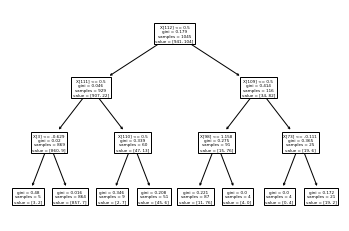

In [18]:
tree.plot_tree(dtree)

In [19]:
dtree

DecisionTreeClassifier(max_depth=3, min_samples_split=3)

In [20]:
from numpy import mean
from numpy import std
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import RepeatedStratifiedKFold
clf = svm.SVC(kernel='linear', C=10).fit(train_X, train_y)
clf.score(test_X, test_y)
CV =  RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(clf, d2_X, d2_y, cv=CV, n_jobs=-1, error_score='raise')
print('Mean Accuracy: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean Accuracy: 0.930 (0.021)


# 10. Read Testing Data Ecoli_test.csv

In [21]:
db4 = pd.read_csv("Ecoli_test.csv")

# 11. Creating New Testing Data NewEcoli_Test.csv
To Make sure don't modify the original data

In [22]:
d4= pd.DataFrame(db4) 
d4.to_csv('NewEcoli_Test.csv',index=False)# create a new file to make sure the orignial data not be modified
d4#test data

,(Num) Column 1,(Num) Column 2,(Num) Column 3,(Num) Column 4,(Num) Column 5,(Num) Column 6,(Num) Column 7,(Num) Column 8,(Num) Column 9,(Num) Column 10,(Num) Column 11,(Num) Column 12,(Num) Column 13,(Num) Column 14,(Num) Column 15,(Num) Column 16,(Num) Column 17,(Num) Column 18,(Num) Column 19,(Num) Column 20,(Num) Column 21,(Num) Column 22,(Num) Column 23,(Num) Column 24,(Num) Column 25,(Num) Column 26,(Num) Column 27,(Num) Column 28,(Num) Column 29,(Num) Column 30,(Num) Column 31,(Num) Column 32,(Num) Column 33,(Num) Column 34,(Num) Column 35,(Num) Column 36,(Num) Column 37,(Num) Column 38,(Num) Column 39,(Num) Column 40,(Num) Column 41,(Num) Column 42,(Num) Column 43,(Num) Column 44,(Num) Column 45,(Num) Column 46,(Num) Column 47,(Num) Column 48,(Num) Column 49,(Num) Column 50,(Num) Column 51,(Num) Column 52,(Num) Column 53,(Num) Column 54,(Num) Column 55,(Num) Column 56,(Num) Column 57,(Num) Column 58,(Num) Column 59,(Num) Column 60,(Num) Column 61,(Num) Column 62,(Num) Column 63,(Num) Column 64,(Num) Column 65,(Num) Column 66,(Num) Column 67,(Num) Column 68,(Num) Column 69,(Num) Column 70,(Num) Column 71,(Num) Column 72,(Num) Column 73,(Num) Column 74,(Num) Column 75,(Num) Column 76,(Num) Column 77,(Num) Column 78,(Num) Column 79,(Num) Column 80,(Num) Column 81,(Num) Column 82,(Num) Column 83,(Num) Column 84,(Num) Column 85,(Num) Column 86,(Num) Column 87,(Num) Column 88,(Num) Column 89,(Num) Column 90,(Num) Column 91,(Num) Column 92,(Num) Column 93,(Num) Column 94,(Num) Column 95,(Num) Column 96,(Num) Column 97,(Num) Column 98,(Num) Column 99,(Num) Column 100,(Num) Column 101,(Num) Column 102,(Num) Column 103,(Nom) Column 104,(Nom) Column 105,(Nom) Column 106,(Nom) Column 107,(Nom) Column 108,(Nom) Column 109,(Nom) Column 110,(Nom) Column 111,(Nom) Column 112,(Nom) Column 113,(Nom) Column 114,(Nom) Column 115,(Nom) Column 116
0,0.040774,-1.680862,-0.941680,-1.266163,0.241564,0.005543,0.689087,0.107993,0.461292,-0.257448,-0.137130,-1.511521,0.482784,0.135439,1.187746,0.403189,0.257184,-0.061717,-0.482379,-0.361533,-0.614690,-0.111927,0.634163,0.473708,1.008219,0.517405,0.684187,0.097364,0.060575,0.729256,-0.013549,-0.732014,0.343815,-0.075295,0.336404,-0.785950,0.094096,0.993485,0.092390,-0.009581,0.529729,0.904048,0.706920,-0.375595,-0.150727,-0.688000,-0.082994,0.387800,0.003048,0.455154,0.355387,0.269578,0.188187,0.011151,0.412893,0.246879,-0.716761,-0.304077,0.428321,-1.594784,-1.501597,-0.123323,0.113885,0.167131,0.080972,-0.605187,-0.012024,-0.928690,0.072898,-0.335136,0.221362,-1.099568,0.045879,0.945570,0.828953,0.414292,0.740814,-0.800554,-0.642118,0.048252,-0.111093,-0.152688,-0.105786,-0.445661,0.003434,0.104407,-0.049810,-0.026932,-0.181171,-0.184896,-0.101070,-0.029383,-0.162840,0.043268,-0.002942,-0.066677,-0.051877,-0.082971,0.020139,-0.169617,-0.002090,0.145683,0.942964,0,0,0,0,0,0,1,1,0,0,1,1,0
1,-1.016965,0.116783,-0.594669,-0.485450,-0.032753,0.010139,-0.106577,-0.201105,-0.554952,-0.073969,-1.084269,-0.108735,-1.110105,-0.170887,-0.754103,-0.565009,-0.058916,-0.216904,0.066800,0.011717,-0.028214,0.080492,0.360790,-0.036549,0.012175,-0.672636,-0.889750,-0.057069,0.047365,-0.982367,-0.354760,-0.271304,0.717462,0.592248,0.578153,0.559250,-0.040012,0.222134,-0.678668,0.681249,3.445154,-0.583614,-0.374557,0.191097,0.037017,-0.612236,0.039618,-0.446232,0.011756,0.098616,0.080283,0.140532,0.155569,0.205651,0.209855,-0.244234,0.242902,0.054109,0.147386,0.170345,-0.137103,-0.185030,-0.439795,2.761947,0.230747,0.640804,-0.105333,0.221483,-0.076506,0.244094,-0.058783,0.240100,-0.009630,-0.546730,-0.164823,-0.018939,-0.243274,-0.005703,-0.097104,-0.675728,-0.334732,-0.357215,0.362880,0.088074,0.165314,4.002462,-0.741346,-0.088649,-0.321614,-0.359311,0.002310,-0.209476,-0.331023,0.053892,0.006285,-0.401264,0.383704,0.390194,1.350685,-0.336361,-0.004734,-0.385694,0.129746,0,0,1,1,0,0,0,0,0,0,0,0,0
2,4.988652,3.949218,1.765028,0.781284,0.048024,-0.001323,-0.021800,0.035213,-0.280243,-0.111165,-0.204340,0.157586,-0.5

# 12. Anomaly detection for training data

In [23]:
from sklearn.model_selection import train_test_split
clf = IsolationForest(max_samples=100, random_state=50)

X1 = d4
y1 = d3

In [24]:
outls1=clf.fit_predict (X1)
outls1

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:441: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1

# 13. Delete Outliers and save it as deloutliertest.csv

In [25]:
for j in range(len(outls1)):
    if outls[j]==-1:
        #print(i)
        d4.drop([j], axis=0,inplace=True)

d4

,(Num) Column 1,(Num) Column 2,(Num) Column 3,(Num) Column 4,(Num) Column 5,(Num) Column 6,(Num) Column 7,(Num) Column 8,(Num) Column 9,(Num) Column 10,(Num) Column 11,(Num) Column 12,(Num) Column 13,(Num) Column 14,(Num) Column 15,(Num) Column 16,(Num) Column 17,(Num) Column 18,(Num) Column 19,(Num) Column 20,(Num) Column 21,(Num) Column 22,(Num) Column 23,(Num) Column 24,(Num) Column 25,(Num) Column 26,(Num) Column 27,(Num) Column 28,(Num) Column 29,(Num) Column 30,(Num) Column 31,(Num) Column 32,(Num) Column 33,(Num) Column 34,(Num) Column 35,(Num) Column 36,(Num) Column 37,(Num) Column 38,(Num) Column 39,(Num) Column 40,(Num) Column 41,(Num) Column 42,(Num) Column 43,(Num) Column 44,(Num) Column 45,(Num) Column 46,(Num) Column 47,(Num) Column 48,(Num) Column 49,(Num) Column 50,(Num) Column 51,(Num) Column 52,(Num) Column 53,(Num) Column 54,(Num) Column 55,(Num) Column 56,(Num) Column 57,(Num) Column 58,(Num) Column 59,(Num) Column 60,(Num) Column 61,(Num) Column 62,(Num) Column 63,(Num) Column 64,(Num) Column 65,(Num) Column 66,(Num) Column 67,(Num) Column 68,(Num) Column 69,(Num) Column 70,(Num) Column 71,(Num) Column 72,(Num) Column 73,(Num) Column 74,(Num) Column 75,(Num) Column 76,(Num) Column 77,(Num) Column 78,(Num) Column 79,(Num) Column 80,(Num) Column 81,(Num) Column 82,(Num) Column 83,(Num) Column 84,(Num) Column 85,(Num) Column 86,(Num) Column 87,(Num) Column 88,(Num) Column 89,(Num) Column 90,(Num) Column 91,(Num) Column 92,(Num) Column 93,(Num) Column 94,(Num) Column 95,(Num) Column 96,(Num) Column 97,(Num) Column 98,(Num) Column 99,(Num) Column 100,(Num) Column 101,(Num) Column 102,(Num) Column 103,(Nom) Column 104,(Nom) Column 105,(Nom) Column 106,(Nom) Column 107,(Nom) Column 108,(Nom) Column 109,(Nom) Column 110,(Nom) Column 111,(Nom) Column 112,(Nom) Column 113,(Nom) Column 114,(Nom) Column 115,(Nom) Column 116
0,0.040774,-1.680862,-0.941680,-1.266163,0.241564,0.005543,0.689087,0.107993,0.461292,-0.257448,-0.137130,-1.511521,0.482784,0.135439,1.187746,0.403189,0.257184,-0.061717,-0.482379,-0.361533,-0.614690,-0.111927,0.634163,0.473708,1.008219,0.517405,0.684187,0.097364,0.060575,0.729256,-0.013549,-0.732014,0.343815,-0.075295,0.336404,-0.785950,0.094096,0.993485,0.092390,-0.009581,0.529729,0.904048,0.706920,-0.375595,-0.150727,-0.688000,-0.082994,0.387800,0.003048,0.455154,0.355387,0.269578,0.188187,0.011151,0.412893,0.246879,-0.716761,-0.304077,0.428321,-1.594784,-1.501597,-0.123323,0.113885,0.167131,0.080972,-0.605187,-0.012024,-0.928690,0.072898,-0.335136,0.221362,-1.099568,0.045879,0.945570,0.828953,0.414292,0.740814,-0.800554,-0.642118,0.048252,-0.111093,-0.152688,-0.105786,-0.445661,0.003434,0.104407,-0.049810,-0.026932,-0.181171,-0.184896,-0.101070,-0.029383,-0.162840,0.043268,-0.002942,-0.066677,-0.051877,-0.082971,0.020139,-0.169617,-0.002090,0.145683,0.942964,0,0,0,0,0,0,1,1,0,0,1,1,0
1,-1.016965,0.116783,-0.594669,-0.485450,-0.032753,0.010139,-0.106577,-0.201105,-0.554952,-0.073969,-1.084269,-0.108735,-1.110105,-0.170887,-0.754103,-0.565009,-0.058916,-0.216904,0.066800,0.011717,-0.028214,0.080492,0.360790,-0.036549,0.012175,-0.672636,-0.889750,-0.057069,0.047365,-0.982367,-0.354760,-0.271304,0.717462,0.592248,0.578153,0.559250,-0.040012,0.222134,-0.678668,0.681249,3.445154,-0.583614,-0.374557,0.191097,0.037017,-0.612236,0.039618,-0.446232,0.011756,0.098616,0.080283,0.140532,0.155569,0.205651,0.209855,-0.244234,0.242902,0.054109,0.147386,0.170345,-0.137103,-0.185030,-0.439795,2.761947,0.230747,0.640804,-0.105333,0.221483,-0.076506,0.244094,-0.058783,0.240100,-0.009630,-0.546730,-0.164823,-0.018939,-0.243274,-0.005703,-0.097104,-0.675728,-0.334732,-0.357215,0.362880,0.088074,0.165314,4.002462,-0.741346,-0.088649,-0.321614,-0.359311,0.002310,-0.209476,-0.331023,0.053892,0.006285,-0.401264,0.383704,0.390194,1.350685,-0.336361,-0.004734,-0.385694,0.129746,0,0,1,1,0,0,0,0,0,0,0,0,0
2,4.988652,3.949218,1.765028,0.781284,0.048024,-0.001323,-0.021800,0.035213,-0.280243,-0.111165,-0.204340,0.157586,-0.5

In [26]:
d4

,(Num) Column 1,(Num) Column 2,(Num) Column 3,(Num) Column 4,(Num) Column 5,(Num) Column 6,(Num) Column 7,(Num) Column 8,(Num) Column 9,(Num) Column 10,(Num) Column 11,(Num) Column 12,(Num) Column 13,(Num) Column 14,(Num) Column 15,(Num) Column 16,(Num) Column 17,(Num) Column 18,(Num) Column 19,(Num) Column 20,(Num) Column 21,(Num) Column 22,(Num) Column 23,(Num) Column 24,(Num) Column 25,(Num) Column 26,(Num) Column 27,(Num) Column 28,(Num) Column 29,(Num) Column 30,(Num) Column 31,(Num) Column 32,(Num) Column 33,(Num) Column 34,(Num) Column 35,(Num) Column 36,(Num) Column 37,(Num) Column 38,(Num) Column 39,(Num) Column 40,(Num) Column 41,(Num) Column 42,(Num) Column 43,(Num) Column 44,(Num) Column 45,(Num) Column 46,(Num) Column 47,(Num) Column 48,(Num) Column 49,(Num) Column 50,(Num) Column 51,(Num) Column 52,(Num) Column 53,(Num) Column 54,(Num) Column 55,(Num) Column 56,(Num) Column 57,(Num) Column 58,(Num) Column 59,(Num) Column 60,(Num) Column 61,(Num) Column 62,(Num) Column 63,(Num) Column 64,(Num) Column 65,(Num) Column 66,(Num) Column 67,(Num) Column 68,(Num) Column 69,(Num) Column 70,(Num) Column 71,(Num) Column 72,(Num) Column 73,(Num) Column 74,(Num) Column 75,(Num) Column 76,(Num) Column 77,(Num) Column 78,(Num) Column 79,(Num) Column 80,(Num) Column 81,(Num) Column 82,(Num) Column 83,(Num) Column 84,(Num) Column 85,(Num) Column 86,(Num) Column 87,(Num) Column 88,(Num) Column 89,(Num) Column 90,(Num) Column 91,(Num) Column 92,(Num) Column 93,(Num) Column 94,(Num) Column 95,(Num) Column 96,(Num) Column 97,(Num) Column 98,(Num) Column 99,(Num) Column 100,(Num) Column 101,(Num) Column 102,(Num) Column 103,(Nom) Column 104,(Nom) Column 105,(Nom) Column 106,(Nom) Column 107,(Nom) Column 108,(Nom) Column 109,(Nom) Column 110,(Nom) Column 111,(Nom) Column 112,(Nom) Column 113,(Nom) Column 114,(Nom) Column 115,(Nom) Column 116
0,0.040774,-1.680862,-0.941680,-1.266163,0.241564,0.005543,0.689087,0.107993,0.461292,-0.257448,-0.137130,-1.511521,0.482784,0.135439,1.187746,0.403189,0.257184,-0.061717,-0.482379,-0.361533,-0.614690,-0.111927,0.634163,0.473708,1.008219,0.517405,0.684187,0.097364,0.060575,0.729256,-0.013549,-0.732014,0.343815,-0.075295,0.336404,-0.785950,0.094096,0.993485,0.092390,-0.009581,0.529729,0.904048,0.706920,-0.375595,-0.150727,-0.688000,-0.082994,0.387800,0.003048,0.455154,0.355387,0.269578,0.188187,0.011151,0.412893,0.246879,-0.716761,-0.304077,0.428321,-1.594784,-1.501597,-0.123323,0.113885,0.167131,0.080972,-0.605187,-0.012024,-0.928690,0.072898,-0.335136,0.221362,-1.099568,0.045879,0.945570,0.828953,0.414292,0.740814,-0.800554,-0.642118,0.048252,-0.111093,-0.152688,-0.105786,-0.445661,0.003434,0.104407,-0.049810,-0.026932,-0.181171,-0.184896,-0.101070,-0.029383,-0.162840,0.043268,-0.002942,-0.066677,-0.051877,-0.082971,0.020139,-0.169617,-0.002090,0.145683,0.942964,0,0,0,0,0,0,1,1,0,0,1,1,0
1,-1.016965,0.116783,-0.594669,-0.485450,-0.032753,0.010139,-0.106577,-0.201105,-0.554952,-0.073969,-1.084269,-0.108735,-1.110105,-0.170887,-0.754103,-0.565009,-0.058916,-0.216904,0.066800,0.011717,-0.028214,0.080492,0.360790,-0.036549,0.012175,-0.672636,-0.889750,-0.057069,0.047365,-0.982367,-0.354760,-0.271304,0.717462,0.592248,0.578153,0.559250,-0.040012,0.222134,-0.678668,0.681249,3.445154,-0.583614,-0.374557,0.191097,0.037017,-0.612236,0.039618,-0.446232,0.011756,0.098616,0.080283,0.140532,0.155569,0.205651,0.209855,-0.244234,0.242902,0.054109,0.147386,0.170345,-0.137103,-0.185030,-0.439795,2.761947,0.230747,0.640804,-0.105333,0.221483,-0.076506,0.244094,-0.058783,0.240100,-0.009630,-0.546730,-0.164823,-0.018939,-0.243274,-0.005703,-0.097104,-0.675728,-0.334732,-0.357215,0.362880,0.088074,0.165314,4.002462,-0.741346,-0.088649,-0.321614,-0.359311,0.002310,-0.209476,-0.331023,0.053892,0.006285,-0.401264,0.383704,0.390194,1.350685,-0.336361,-0.004734,-0.385694,0.129746,0,0,1,1,0,0,0,0,0,0,0,0,0
2,4.988652,3.949218,1.765028,0.781284,0.048024,-0.001323,-0.021800,0.035213,-0.280243,-0.111165,-0.204340,0.157586,-0.5

In [27]:
d4= pd.DataFrame(d4).reset_index(drop=True)
d4.to_csv('deloutliertest.csv',index=False) # to save outlier detection result
d4

,(Num) Column 1,(Num) Column 2,(Num) Column 3,(Num) Column 4,(Num) Column 5,(Num) Column 6,(Num) Column 7,(Num) Column 8,(Num) Column 9,(Num) Column 10,(Num) Column 11,(Num) Column 12,(Num) Column 13,(Num) Column 14,(Num) Column 15,(Num) Column 16,(Num) Column 17,(Num) Column 18,(Num) Column 19,(Num) Column 20,(Num) Column 21,(Num) Column 22,(Num) Column 23,(Num) Column 24,(Num) Column 25,(Num) Column 26,(Num) Column 27,(Num) Column 28,(Num) Column 29,(Num) Column 30,(Num) Column 31,(Num) Column 32,(Num) Column 33,(Num) Column 34,(Num) Column 35,(Num) Column 36,(Num) Column 37,(Num) Column 38,(Num) Column 39,(Num) Column 40,(Num) Column 41,(Num) Column 42,(Num) Column 43,(Num) Column 44,(Num) Column 45,(Num) Column 46,(Num) Column 47,(Num) Column 48,(Num) Column 49,(Num) Column 50,(Num) Column 51,(Num) Column 52,(Num) Column 53,(Num) Column 54,(Num) Column 55,(Num) Column 56,(Num) Column 57,(Num) Column 58,(Num) Column 59,(Num) Column 60,(Num) Column 61,(Num) Column 62,(Num) Column 63,(Num) Column 64,(Num) Column 65,(Num) Column 66,(Num) Column 67,(Num) Column 68,(Num) Column 69,(Num) Column 70,(Num) Column 71,(Num) Column 72,(Num) Column 73,(Num) Column 74,(Num) Column 75,(Num) Column 76,(Num) Column 77,(Num) Column 78,(Num) Column 79,(Num) Column 80,(Num) Column 81,(Num) Column 82,(Num) Column 83,(Num) Column 84,(Num) Column 85,(Num) Column 86,(Num) Column 87,(Num) Column 88,(Num) Column 89,(Num) Column 90,(Num) Column 91,(Num) Column 92,(Num) Column 93,(Num) Column 94,(Num) Column 95,(Num) Column 96,(Num) Column 97,(Num) Column 98,(Num) Column 99,(Num) Column 100,(Num) Column 101,(Num) Column 102,(Num) Column 103,(Nom) Column 104,(Nom) Column 105,(Nom) Column 106,(Nom) Column 107,(Nom) Column 108,(Nom) Column 109,(Nom) Column 110,(Nom) Column 111,(Nom) Column 112,(Nom) Column 113,(Nom) Column 114,(Nom) Column 115,(Nom) Column 116
0,0.040774,-1.680862,-0.941680,-1.266163,0.241564,0.005543,0.689087,0.107993,0.461292,-0.257448,-0.137130,-1.511521,0.482784,0.135439,1.187746,0.403189,0.257184,-0.061717,-0.482379,-0.361533,-0.614690,-0.111927,0.634163,0.473708,1.008219,0.517405,0.684187,0.097364,0.060575,0.729256,-0.013549,-0.732014,0.343815,-0.075295,0.336404,-0.785950,0.094096,0.993485,0.092390,-0.009581,0.529729,0.904048,0.706920,-0.375595,-0.150727,-0.688000,-0.082994,0.387800,0.003048,0.455154,0.355387,0.269578,0.188187,0.011151,0.412893,0.246879,-0.716761,-0.304077,0.428321,-1.594784,-1.501597,-0.123323,0.113885,0.167131,0.080972,-0.605187,-0.012024,-0.928690,0.072898,-0.335136,0.221362,-1.099568,0.045879,0.945570,0.828953,0.414292,0.740814,-0.800554,-0.642118,0.048252,-0.111093,-0.152688,-0.105786,-0.445661,0.003434,0.104407,-0.049810,-0.026932,-0.181171,-0.184896,-0.101070,-0.029383,-0.162840,0.043268,-0.002942,-0.066677,-0.051877,-0.082971,0.020139,-0.169617,-0.002090,0.145683,0.942964,0,0,0,0,0,0,1,1,0,0,1,1,0
1,-1.016965,0.116783,-0.594669,-0.485450,-0.032753,0.010139,-0.106577,-0.201105,-0.554952,-0.073969,-1.084269,-0.108735,-1.110105,-0.170887,-0.754103,-0.565009,-0.058916,-0.216904,0.066800,0.011717,-0.028214,0.080492,0.360790,-0.036549,0.012175,-0.672636,-0.889750,-0.057069,0.047365,-0.982367,-0.354760,-0.271304,0.717462,0.592248,0.578153,0.559250,-0.040012,0.222134,-0.678668,0.681249,3.445154,-0.583614,-0.374557,0.191097,0.037017,-0.612236,0.039618,-0.446232,0.011756,0.098616,0.080283,0.140532,0.155569,0.205651,0.209855,-0.244234,0.242902,0.054109,0.147386,0.170345,-0.137103,-0.185030,-0.439795,2.761947,0.230747,0.640804,-0.105333,0.221483,-0.076506,0.244094,-0.058783,0.240100,-0.009630,-0.546730,-0.164823,-0.018939,-0.243274,-0.005703,-0.097104,-0.675728,-0.334732,-0.357215,0.362880,0.088074,0.165314,4.002462,-0.741346,-0.088649,-0.321614,-0.359311,0.002310,-0.209476,-0.331023,0.053892,0.006285,-0.401264,0.383704,0.390194,1.350685,-0.336361,-0.004734,-0.385694,0.129746,0,0,1,1,0,0,0,0,0,0,0,0,0
2,4.988652,3.949218,1.765028,0.781284,0.048024,-0.001323,-0.021800,0.035213,-0.280243,-0.111165,-0.204340,0.157586,-0.5

# 14. Standard Normal Distribution for Training Data

In [28]:
coll2=d4.iloc[:,103:116]
coll2 #Nominal value for d4

,(Nom) Column 104,(Nom) Column 105,(Nom) Column 106,(Nom) Column 107,(Nom) Column 108,(Nom) Column 109,(Nom) Column 110,(Nom) Column 111,(Nom) Column 112,(Nom) Column 113,(Nom) Column 114,(Nom) Column 115,(Nom) Column 116
0,0,0,0,0,0,0,1,1,0,0,1,1,0
1,0,0,1,1,0,0,0,0,0,0,0,0,0
2,0,1,1,0,0,0,0,0,0,0,1,1,0
3,0,0,1,1,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
905,1,1,1,0,0,0,0,0,0,0,0,0,0
906,1,1,1,0,0,0,0,0,0,0,1,1,0
907,1,1,0,0,0,0,0,0,0,0,1,1,0
908,0,1,1,0,0,0,1,1,0,0,1,1,0


In [29]:
d4.iloc[:,0:103]

,(Num) Column 1,(Num) Column 2,(Num) Column 3,(Num) Column 4,(Num) Column 5,(Num) Column 6,(Num) Column 7,(Num) Column 8,(Num) Column 9,(Num) Column 10,(Num) Column 11,(Num) Column 12,(Num) Column 13,(Num) Column 14,(Num) Column 15,(Num) Column 16,(Num) Column 17,(Num) Column 18,(Num) Column 19,(Num) Column 20,(Num) Column 21,(Num) Column 22,(Num) Column 23,(Num) Column 24,(Num) Column 25,(Num) Column 26,(Num) Column 27,(Num) Column 28,(Num) Column 29,(Num) Column 30,(Num) Column 31,(Num) Column 32,(Num) Column 33,(Num) Column 34,(Num) Column 35,(Num) Column 36,(Num) Column 37,(Num) Column 38,(Num) Column 39,(Num) Column 40,(Num) Column 41,(Num) Column 42,(Num) Column 43,(Num) Column 44,(Num) Column 45,(Num) Column 46,(Num) Column 47,(Num) Column 48,(Num) Column 49,(Num) Column 50,(Num) Column 51,(Num) Column 52,(Num) Column 53,(Num) Column 54,(Num) Column 55,(Num) Column 56,(Num) Column 57,(Num) Column 58,(Num) Column 59,(Num) Column 60,(Num) Column 61,(Num) Column 62,(Num) Column 63,(Num) Column 64,(Num) Column 65,(Num) Column 66,(Num) Column 67,(Num) Column 68,(Num) Column 69,(Num) Column 70,(Num) Column 71,(Num) Column 72,(Num) Column 73,(Num) Column 74,(Num) Column 75,(Num) Column 76,(Num) Column 77,(Num) Column 78,(Num) Column 79,(Num) Column 80,(Num) Column 81,(Num) Column 82,(Num) Column 83,(Num) Column 84,(Num) Column 85,(Num) Column 86,(Num) Column 87,(Num) Column 88,(Num) Column 89,(Num) Column 90,(Num) Column 91,(Num) Column 92,(Num) Column 93,(Num) Column 94,(Num) Column 95,(Num) Column 96,(Num) Column 97,(Num) Column 98,(Num) Column 99,(Num) Column 100,(Num) Column 101,(Num) Column 102,(Num) Column 103
0,0.040774,-1.680862,-0.941680,-1.266163,0.241564,0.005543,0.689087,0.107993,0.461292,-0.257448,-0.137130,-1.511521,0.482784,0.135439,1.187746,0.403189,0.257184,-0.061717,-0.482379,-0.361533,-0.614690,-0.111927,0.634163,0.473708,1.008219,0.517405,0.684187,0.097364,0.060575,0.729256,-0.013549,-0.732014,0.343815,-0.075295,0.336404,-0.785950,0.094096,0.993485,0.092390,-0.009581,0.529729,0.904048,0.706920,-0.375595,-0.150727,-0.688000,-0.082994,0.387800,0.003048,0.455154,0.355387,0.269578,0.188187,0.011151,0.412893,0.246879,-0.716761,-0.304077,0.428321,-1.594784,-1.501597,-0.123323,0.113885,0.167131,0.080972,-0.605187,-0.012024,-0.928690,0.072898,-0.335136,0.221362,-1.099568,0.045879,0.945570,0.828953,0.414292,0.740814,-0.800554,-0.642118,0.048252,-0.111093,-0.152688,-0.105786,-0.445661,0.003434,0.104407,-0.049810,-0.026932,-0.181171,-0.184896,-0.101070,-0.029383,-0.162840,0.043268,-0.002942,-0.066677,-0.051877,-0.082971,0.020139,-0.169617,-0.002090,0.145683,0.942964
1,-1.016965,0.116783,-0.594669,-0.485450,-0.032753,0.010139,-0.106577,-0.201105,-0.554952,-0.073969,-1.084269,-0.108735,-1.110105,-0.170887,-0.754103,-0.565009,-0.058916,-0.216904,0.066800,0.011717,-0.028214,0.080492,0.360790,-0.036549,0.012175,-0.672636,-0.889750,-0.057069,0.047365,-0.982367,-0.354760,-0.271304,0.717462,0.592248,0.578153,0.559250,-0.040012,0.222134,-0.678668,0.681249,3.445154,-0.583614,-0.374557,0.191097,0.037017,-0.612236,0.039618,-0.446232,0.011756,0.098616,0.080283,0.140532,0.155569,0.205651,0.209855,-0.244234,0.242902,0.054109,0.147386,0.170345,-0.137103,-0.185030,-0.439795,2.761947,0.230747,0.640804,-0.105333,0.221483,-0.076506,0.244094,-0.058783,0.240100,-0.009630,-0.546730,-0.164823,-0.018939,-0.243274,-0.005703,-0.097104,-0.675728,-0.334732,-0.357215,0.362880,0.088074,0.165314,4.002462,-0.741346,-0.088649,-0.321614,-0.359311,0.002310,-0.209476,-0.331023,0.053892,0.006285,-0.401264,0.383704,0.390194,1.350685,-0.336361,-0.004734,-0.385694,0.129746
2,4.988652,3.949218,1.765028,0.781284,0.048024,-0.001323,-0.021800,0.035213,-0.280243,-0.111165,-0.204340,0.157586,-0.534014,0.405858,-0.115836,0.108735,0.017286,0.011381,-0.049861,-0.167190,-0.397283,-0.092330,-0.418341,-0.132840,0.187989,-0.567896,-0.302655,-0.073503,-0.016207,-0.627287,-0.255668,-0.604715,-0.570908,-0.195668,-0.472260,0.287125,-0.019425,-0.303891,-0.255939,0.128801,-0.9

In [30]:
from sklearn.preprocessing import StandardScaler

scaler2 = StandardScaler()
scaler2.fit(d4.iloc[:,0:103])
scaled_features2 = scaler.transform(d4.iloc[:,0:103])
df_feat2 = pd.DataFrame(scaled_features2,columns=d4.iloc[:,0:104].columns[:-1])
df_feat2
final_df_feat2 = pd.concat([df_feat2, coll2], axis=1)
final_df_feat2

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- (Num) Column 1 
Feature names seen at fit time, yet now missing:
- (Num) Column 1

  warnings.warn(message, FutureWarning)


,(Num) Column 1,(Num) Column 2,(Num) Column 3,(Num) Column 4,(Num) Column 5,(Num) Column 6,(Num) Column 7,(Num) Column 8,(Num) Column 9,(Num) Column 10,(Num) Column 11,(Num) Column 12,(Num) Column 13,(Num) Column 14,(Num) Column 15,(Num) Column 16,(Num) Column 17,(Num) Column 18,(Num) Column 19,(Num) Column 20,(Num) Column 21,(Num) Column 22,(Num) Column 23,(Num) Column 24,(Num) Column 25,(Num) Column 26,(Num) Column 27,(Num) Column 28,(Num) Column 29,(Num) Column 30,(Num) Column 31,(Num) Column 32,(Num) Column 33,(Num) Column 34,(Num) Column 35,(Num) Column 36,(Num) Column 37,(Num) Column 38,(Num) Column 39,(Num) Column 40,(Num) Column 41,(Num) Column 42,(Num) Column 43,(Num) Column 44,(Num) Column 45,(Num) Column 46,(Num) Column 47,(Num) Column 48,(Num) Column 49,(Num) Column 50,(Num) Column 51,(Num) Column 52,(Num) Column 53,(Num) Column 54,(Num) Column 55,(Num) Column 56,(Num) Column 57,(Num) Column 58,(Num) Column 59,(Num) Column 60,(Num) Column 61,(Num) Column 62,(Num) Column 63,(Num) Column 64,(Num) Column 65,(Num) Column 66,(Num) Column 67,(Num) Column 68,(Num) Column 69,(Num) Column 70,(Num) Column 71,(Num) Column 72,(Num) Column 73,(Num) Column 74,(Num) Column 75,(Num) Column 76,(Num) Column 77,(Num) Column 78,(Num) Column 79,(Num) Column 80,(Num) Column 81,(Num) Column 82,(Num) Column 83,(Num) Column 84,(Num) Column 85,(Num) Column 86,(Num) Column 87,(Num) Column 88,(Num) Column 89,(Num) Column 90,(Num) Column 91,(Num) Column 92,(Num) Column 93,(Num) Column 94,(Num) Column 95,(Num) Column 96,(Num) Column 97,(Num) Column 98,(Num) Column 99,(Num) Column 100,(Num) Column 101,(Num) Column 102,(Num) Column 103,(Nom) Column 104,(Nom) Column 105,(Nom) Column 106,(Nom) Column 107,(Nom) Column 108,(Nom) Column 109,(Nom) Column 110,(Nom) Column 111,(Nom) Column 112,(Nom) Column 113,(Nom) Column 114,(Nom) Column 115,(Nom) Column 116
0,-0.044658,-0.465468,-0.202127,-0.355983,0.092480,0.003434,0.615435,0.038157,0.208930,-0.081605,-0.019411,-0.392847,0.335829,0.095987,0.335382,0.111102,0.580667,-0.082294,-1.058876,-0.182249,-0.139939,-0.175250,0.272295,0.392978,0.236631,0.135033,0.252796,1.008740,0.237636,0.535764,0.000719,-0.182796,0.119550,-0.086671,0.057288,-0.375966,1.077404,0.518467,-0.006924,0.043289,0.087728,0.393392,1.069675,-0.100091,-0.112332,-0.207955,-0.150831,0.058837,0.029711,0.006534,0.218724,0.144520,0.134456,-0.047857,0.056702,0.053604,-0.214202,-0.250706,0.297204,-0.246231,-0.235132,-0.042970,0.034214,0.158661,0.089927,-0.280236,-0.000326,-0.894839,0.185832,-0.242407,0.071121,-0.179633,0.613430,0.245041,0.818866,0.260387,0.188033,-0.546056,-1.225992,0.031680,-0.088458,-0.094601,-0.070511,-0.032253,0.054266,0.036711,-0.006196,-0.064009,-0.020817,-0.082070,-0.163631,-0.044325,-0.080443,-0.024450,-0.009259,-0.044567,-0.005391,0.003390,-0.010069,-0.031081,-0.108909,0.114938,0.220630,0,0,0,0,0,0,1,1,0,0,1,1,0
1,-0.265709,0.039181,-0.128934,-0.156550,-0.046424,0.033243,-0.089468,-0.182898,-0.226931,0.002866,-0.279636,-0.047755,-0.689549,-0.199185,-0.200006,-0.141225,-0.114743,-0.324673,0.178788,0.014219,0.024789,0.156853,0.159527,-0.070613,0.005806,-0.189221,-0.392018,-0.579922,0.196126,-0.632921,-0.132423,-0.045814,0.222926,0.537977,0.092884,0.239902,-0.434101,0.130085,-0.204584,0.169326,0.697532,-0.291811,-0.551689,0.034050,0.026673,-0.183230,0.025610,-0.095327,0.069571,-0.013558,0.065358,0.086446,0.108488,-0.000134,0.011497,-0.053619,0.084712,0.013696,0.103940,0.021848,0.006327,-0.063222,-0.255118,1.982511,0.256251,0.317219,-0.095721,0.253534,-0.220858,0.255061,-0.067192,0.075079,-0.102373,-0.075550,-0.175142,0.031808,-0.080636,0.011152,-0.181271,-0.187183,-0.224093,-0.172132,0.166466,0.029958,0.476930,1.209417,-0.142424,-0.154340,-0.039694,-0.143131,0.003330,-0.127990,-0.135393,-0.022198,0.068027,-0.195653,0.214141,0.080090,0.110546,-0.082693,-0.284211,-0.181275,0.030119,0,0,1,1,0,0,0,0,0,0,0,0,0
2,0.989371,1.115051,0.368784,0.167038,-0.005521,-0.041105,-0.014361,-0.013892,-0.109110,-0.014258,-0.037877,0.017761,-0

# 15. Making prediction for testing data

In [31]:
predictions1 = dtree.predict(final_df_feat2)
print(predictions1)

[0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/base.py:484: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- (Num) Column 1 
Feature names seen at fit time, yet now missing:
- (Num) Column 1

  warnings.warn(message, FutureWarning)


# 16. Save prediction result as s4603983.csv

In [32]:
my_df = pd.DataFrame(predictions1)
my_df.to_csv('s4603983.csv', index=False) 
my_df

,0
0,0
1,0
2,0
3,0
4,0
...,...
905,0
906,0
907,0
908,0
